# Introduction to Chaos Communications

Warren Li

May 2, 2017

<img src="chaos_1.jpg" width="500px">

### History of Chaos

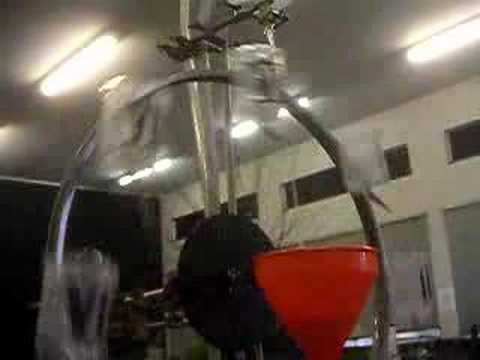

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zhOBibeW5J0')

### Simple nonlinear equations don't necessarily have simple behaviors!

Lorenz Equations 
$$
\dot{x} = \sigma(y-x)
$$
$$
\dot{y} = rx - y - xz
$$
$$
\dot{z} = xy - bz
$$

![](lorenz.gif)

### Definition of an Attractor

A closed set $A$ with the following properties:

1. $A$ is an invariant set: any trajectory $x(t)$ that starts in $A$ stays in $A$ for all time 

2. $A$ attracts an open set of initial conditions: there is an open set $U$ containing $A$ such that if $\mathbf{x}(0) \in U$, then the distance from $\mathbf{x}(t)$ to $A$ tends to zero as $t \to \infty$. The largest such U is called the basin of attraction.

3. A is minimal: there is no proper subset of A that satisfies conditions (1) and (2).

### Divergence of nearby trajectories on the Lorenz attractor 
(Strogatz, Section 9.3)

$t=3$
![](lorenz_1.png)

Numerical integration and computer graphics by Thanos Siapas, using Equation (9.2.1) with parameters $\sigma=10, b =8/3, r =28$.

$t=6$

![](lorenz_2.png)

$t=9$

![](lorenz_3.png)

$t=15$
![](lorenz_4.png)

### Definition of Chaos

There's no universal definition of chaos, but here's some basic "ingredients":

1. "Aperiodic long-term behavior" means that there are trajectories which do not settle down to fixed points, periodic orbits, or quasiperiodic orbits as $t \to \infty$. 

2. "Deterministic" means that the system has no random or noisy inputs or parameters. The irregular behavior arises from the system's nonlinearity, rather than from noisy driving forces.

3. "Sensitive Dependence on inital conditions" means that nearby trajectories separate exponentially fast.

### The Double Scroll Attractor



In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display, HTML
import numpy as np
import math
%matplotlib inline

def f(x, y, a):
    return a * (y - piecewise(x))

def piecewise(x):
    m0 = -1/7
    m1 = 2/7
    if x < -1:
        return m1 * (x + 1) - m0 
    elif x >= -1 and x <= 1:
        return m0 * x
    return m1 * (x - 1) + m0

def g(x, y, z):
    return x - y + z

def h(y, b):
    return -b * y

#fourth-order numerical integration
def runge_kutta(x_init, y_init, z_init, num_iter, a, b):
    x = x_init
    y = y_init
    z = z_init

    #time step
    dt = 0.1
    iterations = num_iter
    t = np.linspace(0, dt * iterations, iterations)

    #plotting parameters
    X = np.empty((iterations,))
    Y = np.empty((iterations,))
    Z = np.empty((iterations,))

    X[0] = x
    Y[0] = y
    Z[0] = z

    for i in range(1, iterations):
        k_x1 = f(x, y, a) * dt
        k_y1 = g(x, y, z) * dt
        k_z1 = h(y, b) * dt

        k_x2 = f(x + k_x1/2, y + k_y1/2, a) * dt
        k_y2 = g(x + k_x1/2, y + k_y1/2, z + k_z1/2) * dt
        k_z2 = h(y + k_y1/2, b) * dt

        k_x3 = f(x + k_x2/2, y + k_y2/2, a) * dt
        k_y3 = g(x + k_x2/2, y + k_y2/2, z + k_z2/2) * dt
        k_z3 = h(y + k_y2/2, b) * dt

        k_x4 = f(x + k_x3/2, y + k_y3/2, a) * dt
        k_y4 = g(x + k_x3/2, y + k_y3/2, z + k_z3/2) * dt
        k_z4 = h(y + k_y3/2, b) * dt
                
        x_0 = x
        y_0 = y
        z_0 = z

        x = x_0 + (1/6) * (k_x1 + 2*k_x2 + 2*k_x3 + k_x4) 
        y = y_0 + (1/6) * (k_y1 + 2*k_y2 + 2*k_y3 + k_y4)
        z = z_0 + (1/6) * (k_z1 + 2*k_z2 + 2*k_z3 + k_z4) 

        X[i] = x
        Y[i] = y
        Z[i] = z
        
    return {'x': X, 'y': Y, 'z': Z, 't': t}      

<IPython.core.display.Javascript object>


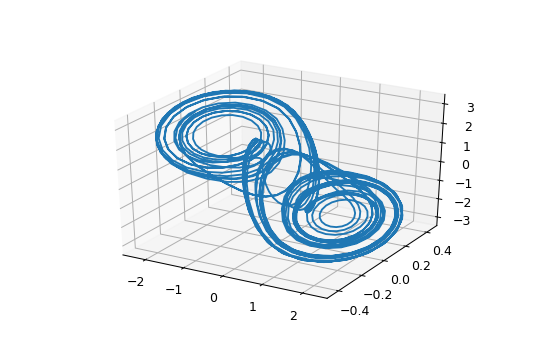

In [16]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cutoff = 9000 #remove transient points

vals = runge_kutta(.1, .1, .6, 10000, 8.8, 15.0)
ax.plot(vals['x'][cutoff:], vals['y'][cutoff:], vals['z'][cutoff:])

<IPython.core.display.Javascript object>


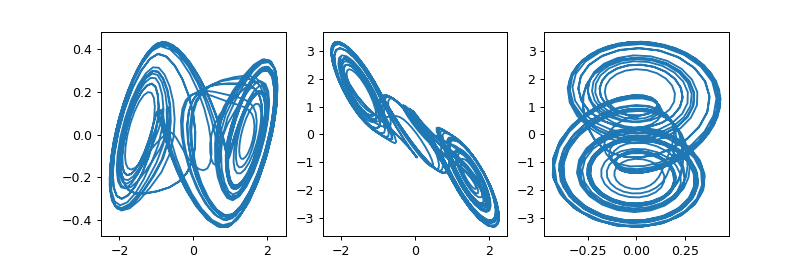

<IPython.core.display.Javascript object>


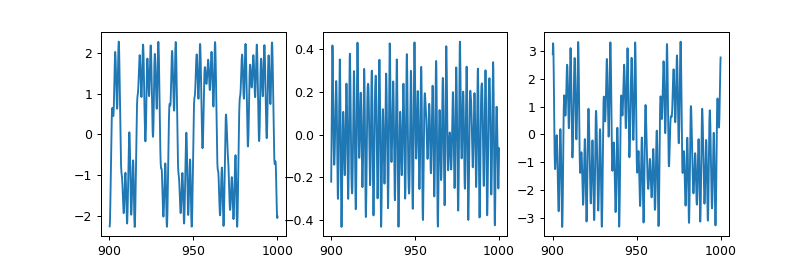

In [17]:
fig2 = plt.figure(figsize=(9,3))
axis = fig2.add_subplot(1, 3, 1)
axis.plot(vals['x'][cutoff:], vals['y'][cutoff:])
axis = fig2.add_subplot(1, 3, 2)
plt.plot(vals['x'][cutoff:], vals['z'][cutoff:])
axis = fig2.add_subplot(1, 3, 3)
plt.plot(vals['y'][cutoff:], vals['z'][cutoff:])

fig3 = plt.figure(figsize=(9,3))
axis = fig3.add_subplot(1, 3, 1)
axis.plot(vals['t'][cutoff:], vals['x'][cutoff:])
axis = fig3.add_subplot(1, 3, 2)
plt.plot(vals['t'][cutoff:], vals['y'][cutoff:])
axis = fig3.add_subplot(1, 3, 3)
plt.plot(vals['t'][cutoff:], vals['z'][cutoff:])

### Circuit Representation

<table>
<tr>
    <td>
        <img src="chua_1.png" width="400px">
    </td>
    <td style="font-size:18pt; line-height:50px">
        $$\dot{x} = \alpha[y-x-f(x)]$$
        $$RC_2\dot{y} = x-y+Rz$$
        $$\dot{z} = -\beta y$$
    </td>
</tr>
<tr>
    <td>
        <img src="chua_3.jpg" width="280px">
    </td>
    <td>
        <img src="chua_2.png" width="300px">
    </td>
</tr>
</table>

![](ivcurve.png)

### Proof of Synchronization

<img src="chaos_2.jpg" width="500px">

In [7]:
from IPython.display import HTML
HTML("""
<video width="500" height="380" controls>
  <source src="sync.mp4" type="video/mp4">
</video>
""")

### Transmission Scheme
1. Parameter Modulation
2. Digipot & Master/Slave Configuration

In [8]:
HTML("""
<video width="500" height="380" controls>
  <source src="error.mp4" type="video/mp4">
</video>
""")

In [9]:
HTML("""
<video width="500" height="380" controls>
  <source src="transmit.mp4" type="video/mp4">
</video>
""")